In [104]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [105]:
alsi = pd.read_csv("Dataset/Mercury/alsimap_smooth_032015.png.csv", header = None) 
casi = pd.read_csv("Dataset/Mercury/casimap_smooth_032015.png.csv", header = None) 
fesi = pd.read_csv("Dataset/Mercury/fesimap_smooth_032015.png.csv", header = None) 
mgsi = pd.read_csv("Dataset/Mercury/mgsimap_smooth_032015.png.csv", header = None) 
ssi = pd.read_csv("Dataset/Mercury/ssimap_smooth_032015.png.csv", header = None) 
top = pd.read_csv("Dataset/Mercury/mercury-albedo-top-half.png.csv", header = None) 
bottom = pd.read_csv("Dataset/Mercury/mercury-albedo-resized-bottom-half.png.csv", header = None) 

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'bottom half of Mercury Albedo')

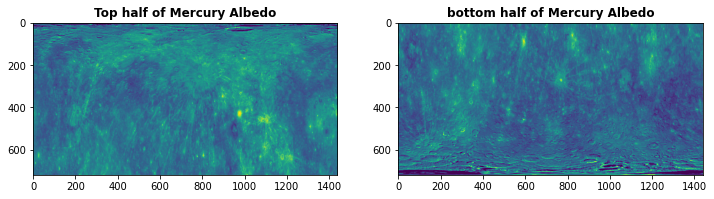

In [107]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(bottom)
plt.title('bottom half of Mercury Albedo', fontweight="bold")

### Filling gaps

Text(0.5, 1.0, 'ALSI without gaps')

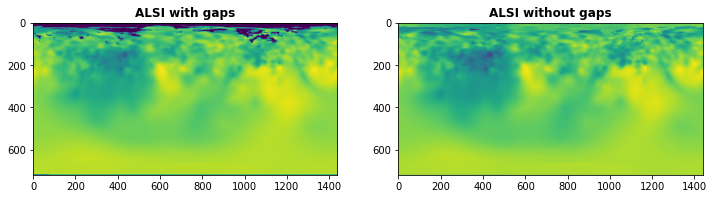

In [108]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(alsi)
plt.title('ALSI with gaps', fontweight="bold")

alsi_mean = alsi.replace(0E+00, alsi.mean())

plt.subplot(1, 2, 2)
plt.imshow(alsi_mean)
plt.title('ALSI without gaps', fontweight="bold")

In [109]:
alsi_mean.std().sum()

122.94801210708867

Text(0.5, 1.0, 'ALSI without gaps')

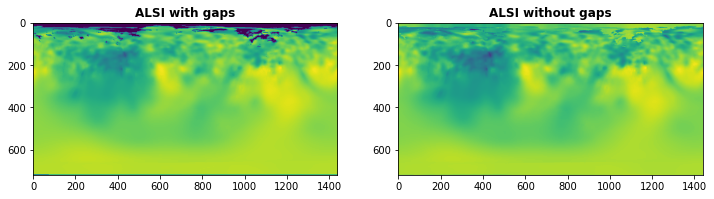

In [110]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(alsi)
plt.title('ALSI with gaps', fontweight="bold")

alsi_median = alsi.replace(0E+00, alsi.median())

plt.subplot(1, 2, 2)
plt.imshow(alsi_median)
plt.title('ALSI without gaps', fontweight="bold")

In [111]:
alsi_median.std().sum()

122.29112638414719

<font color='red'> On comparing the standard deviations of both data, imputing gaps with median is giving better results.

In [112]:
alsi = alsi_median

Text(0.5, 1.0, 'CaSi without gaps')

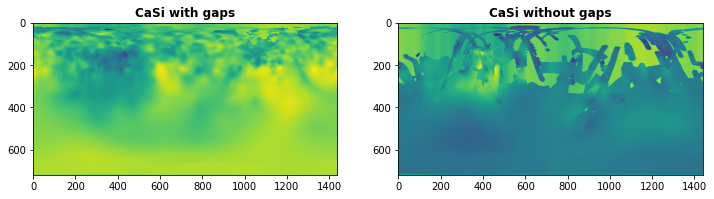

In [139]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(alsi)
plt.title('CaSi with gaps', fontweight="bold")

casi = casi.replace(0E+00, alsi.median())

plt.subplot(1, 2, 2)
plt.imshow(casi)
plt.title('CaSi without gaps', fontweight="bold")

Text(0.5, 1.0, 'FeSi without gaps')

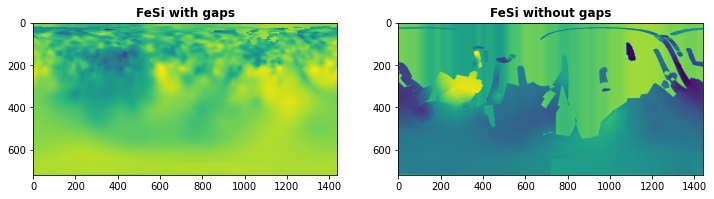

In [140]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(alsi)
plt.title('FeSi with gaps', fontweight="bold")

fesi = fesi.replace(0E+00, alsi.median())

plt.subplot(1, 2, 2)
plt.imshow(fesi)
plt.title('FeSi without gaps', fontweight="bold")

Text(0.5, 1.0, 'MgSi without gaps')

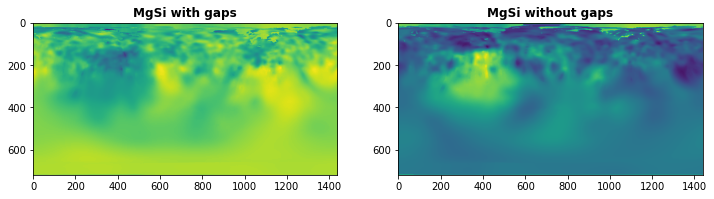

In [141]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(alsi)
plt.title('MgSi with gaps', fontweight="bold")

mgsi = mgsi.replace(0E+00, alsi.median())

plt.subplot(1, 2, 2)
plt.imshow(mgsi)
plt.title('MgSi without gaps', fontweight="bold")

Text(0.5, 1.0, 'SSi without gaps')

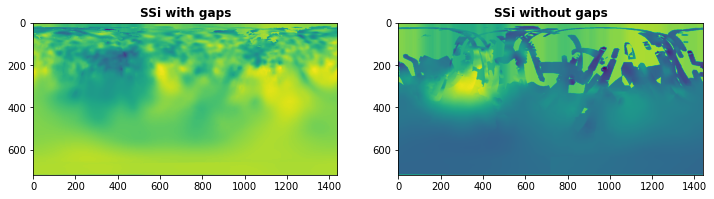

In [142]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(alsi)
plt.title('SSi with gaps', fontweight="bold")

ssi = ssi.replace(0E+00, alsi.median())

plt.subplot(1, 2, 2)
plt.imshow(ssi)
plt.title('SSi without gaps', fontweight="bold")

### ALSI

#### Data split

In [113]:
x_train = top
y_train = alsi
x_test = bottom
y_test = alsi

We are not using XGBRegressor for this problem because size of dataset is large and computation time of XGBRegressor is very long.

In [114]:
from numpy import asarray
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense

In [115]:
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(y_train.shape[1]))
model.compile(loss="mse", optimizer="adam")
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 100)               144100    
                                                                 
 dense_37 (Dense)            (None, 32)                3232      
                                                                 
 dense_38 (Dense)            (None, 1440)              47520     
                                                                 
Total params: 194,852
Trainable params: 194,852
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.fit(x_train, y_train, epochs=1000, batch_size=12, verbose=0)
ypred = model.predict(x_test)

In [117]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ypred)

0.01585633437039213

For these outputs greyscale images are easy to analyze

Text(0.5, 1.0, 'Predicted Image')

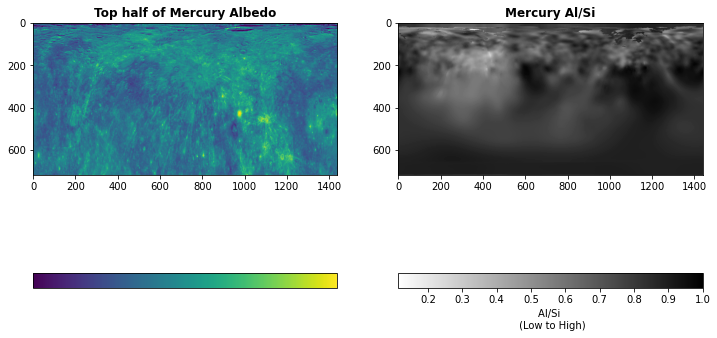

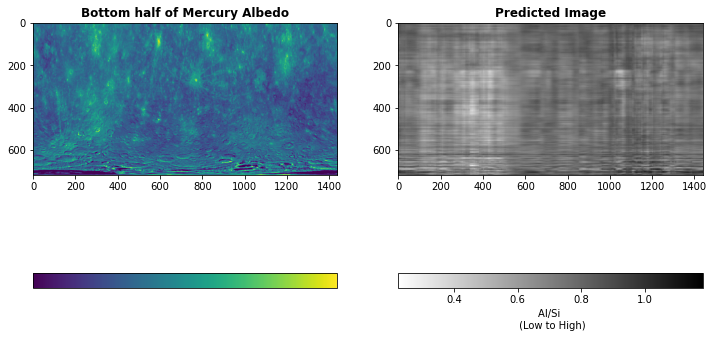

In [118]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(alsi, cmap = 'binary')
plt.title('Mercury Al/Si', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Al/Si \n (Low to High)')

plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(bottom)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Bottom half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(ypred, cmap = 'binary')
plt.colorbar(orientation='horizontal', label= 'Al/Si \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

### CASI

In [119]:
x_train = top
y_train = casi
x_test = bottom
y_test = casi

We are not using XGBRegressor for this problem because size of dataset is large and computation time of XGBRegressor is very long.

In [120]:
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(y_train.shape[1]))
model.compile(loss="mse", optimizer="adam")
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 100)               144100    
                                                                 
 dense_40 (Dense)            (None, 32)                3232      
                                                                 
 dense_41 (Dense)            (None, 1440)              47520     
                                                                 
Total params: 194,852
Trainable params: 194,852
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.fit(x_train, y_train, epochs=1000, batch_size=12, verbose=0)
ypred = model.predict(x_test)

In [122]:
mean_squared_error(y_test,ypred)

0.02935314307516593

Text(0.5, 1.0, 'Predicted Image')

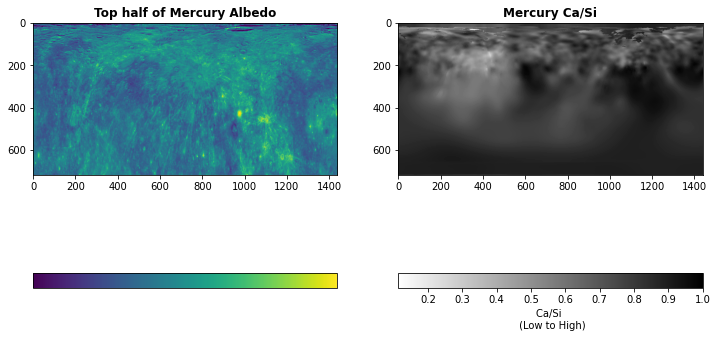

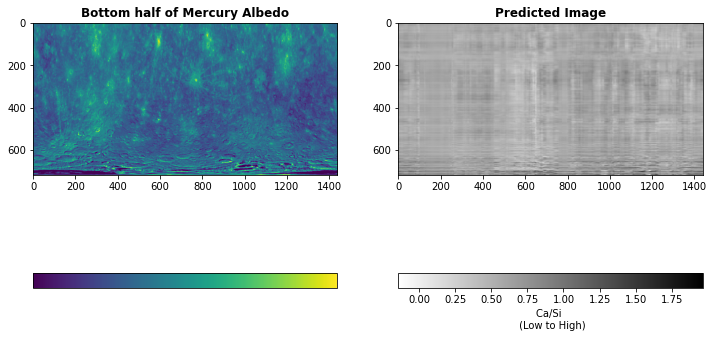

In [123]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(alsi, cmap = 'binary')
plt.title('Mercury Ca/Si', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Ca/Si \n (Low to High)')

plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(bottom)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Bottom half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(ypred, cmap = 'binary')
plt.colorbar(orientation='horizontal', label= 'Ca/Si \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

### FESI

In [124]:
x_train = top
y_train = fesi
x_test = bottom
y_test = fesi

We are not using XGBRegressor for this problem because size of dataset is large and computation time of XGBRegressor is very long.

In [125]:
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(y_train.shape[1]))
model.compile(loss="mse", optimizer="adam")
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 100)               144100    
                                                                 
 dense_43 (Dense)            (None, 32)                3232      
                                                                 
 dense_44 (Dense)            (None, 1440)              47520     
                                                                 
Total params: 194,852
Trainable params: 194,852
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.fit(x_train, y_train, epochs=1000, batch_size=12, verbose=0)
ypred = model.predict(x_test)

In [127]:
mean_squared_error(y_test,ypred)

0.028232106945608133

Text(0.5, 1.0, 'Predicted Image')

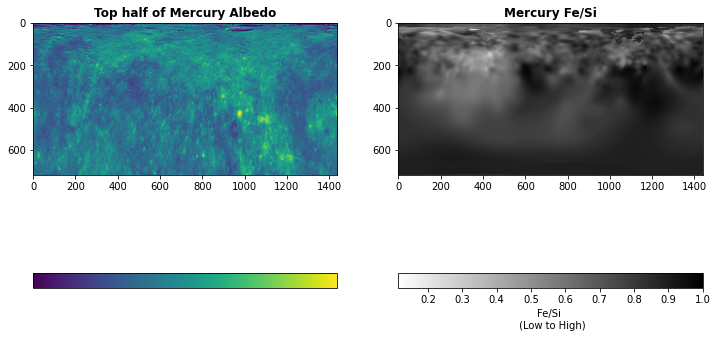

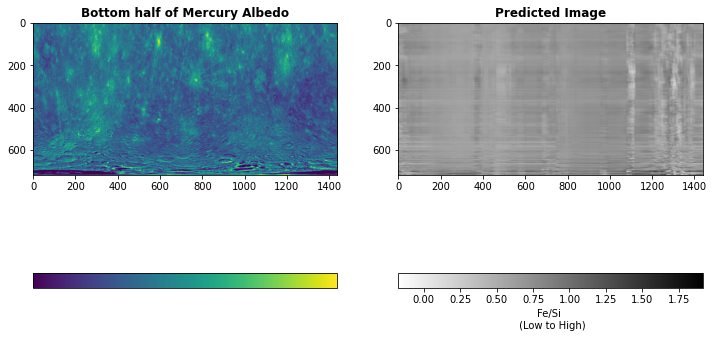

In [128]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(alsi, cmap = 'binary')
plt.title('Mercury Fe/Si', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Fe/Si \n (Low to High)')

plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(bottom)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Bottom half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(ypred, cmap = 'binary')
plt.colorbar(orientation='horizontal', label= 'Fe/Si \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

### MGSI

In [129]:
x_train = top
y_train = mgsi
x_test = bottom
y_test = mgsi

We are not using XGBRegressor for this problem because size of dataset is large and computation time of XGBRegressor is very long.

In [130]:
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(y_train.shape[1]))
model.compile(loss="mse", optimizer="adam")
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 100)               144100    
                                                                 
 dense_46 (Dense)            (None, 32)                3232      
                                                                 
 dense_47 (Dense)            (None, 1440)              47520     
                                                                 
Total params: 194,852
Trainable params: 194,852
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.fit(x_train, y_train, epochs=1000, batch_size=12, verbose=0)
ypred = model.predict(x_test)

In [132]:
mean_squared_error(y_test,ypred)

0.012962058376719043

Text(0.5, 1.0, 'Predicted Image')

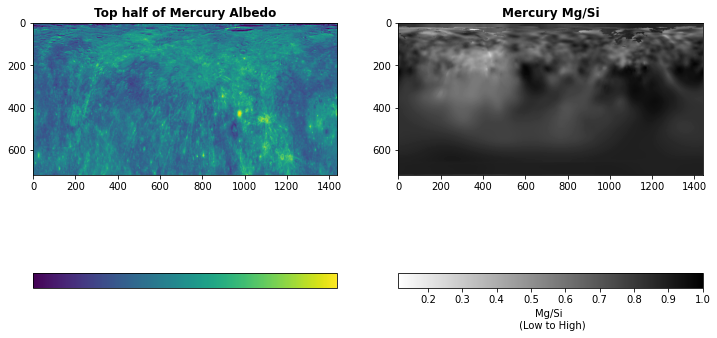

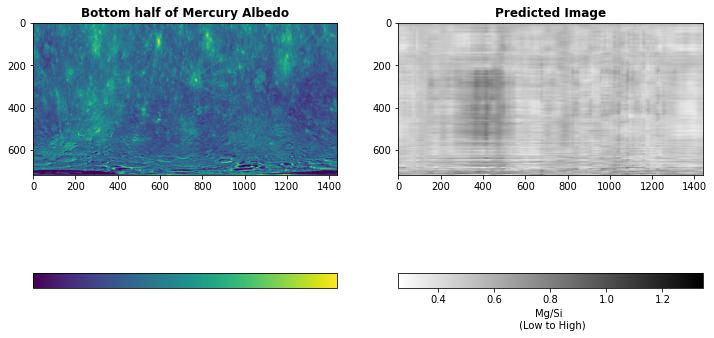

In [133]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(alsi, cmap = 'binary')
plt.title('Mercury Mg/Si', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Mg/Si \n (Low to High)')

plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(bottom)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Bottom half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(ypred, cmap = 'binary')
plt.colorbar(orientation='horizontal', label= 'Mg/Si \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

### SSI

In [134]:
x_train = top
y_train = ssi
x_test = bottom
y_test = ssi

We are not using XGBRegressor for this problem because size of dataset is large and computation time of XGBRegressor is very long.

In [135]:
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(y_train.shape[1]))
model.compile(loss="mse", optimizer="adam")
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 100)               144100    
                                                                 
 dense_49 (Dense)            (None, 32)                3232      
                                                                 
 dense_50 (Dense)            (None, 1440)              47520     
                                                                 
Total params: 194,852
Trainable params: 194,852
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.fit(x_train, y_train, epochs=1000, batch_size=12, verbose=0)
ypred = model.predict(x_test)

In [137]:
mean_squared_error(y_test,ypred)

0.040603376142447495

Text(0.5, 1.0, 'Predicted Image')

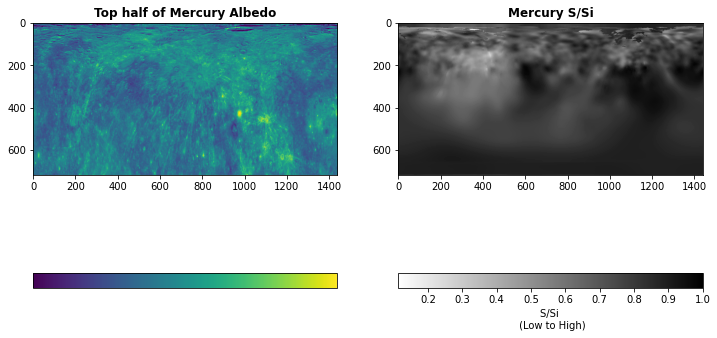

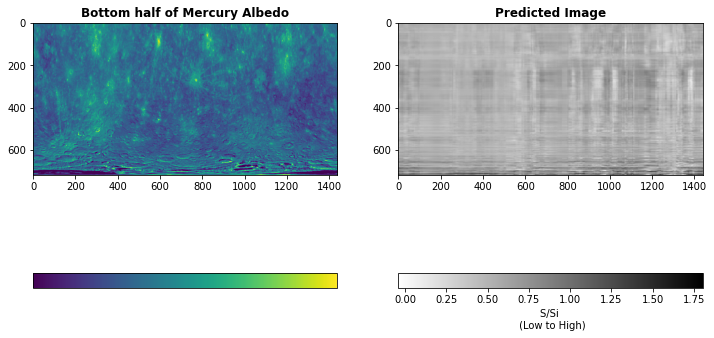

In [138]:
plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(top)
plt.title('Top half of Mercury Albedo', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(alsi, cmap = 'binary')
plt.title('Mercury S/Si', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'S/Si \n (Low to High)')

plt.figure(figsize =(12,12))
plt.subplot(1, 2, 1)
plt.imshow(bottom)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Bottom half of Mercury Albedo', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(ypred, cmap = 'binary')
plt.colorbar(orientation='horizontal', label= 'S/Si \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")